Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error: 460.10530340814626
R-squared: -0.12896326679130965


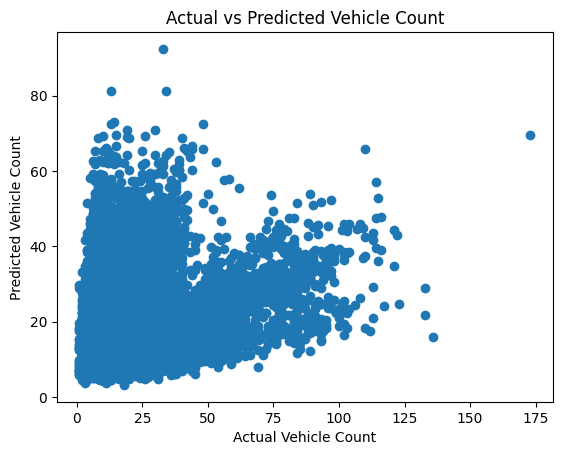

Predicted Vehicle Count: 8.6


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [15]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset into 'train' variable
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive (1)/vehicles.csv')

# Function to extract features from DateTime
def get_dom(dt):
    return dt.day

def get_weekday(dt):
    return dt.weekday()

def get_hour(dt):
    return dt.hour

def get_year(dt):
    return dt.year

def get_month(dt):
    return dt.month

def get_dayofyear(dt):
    return dt.dayofyear

def get_weekofyear(dt):
    return dt.weekofyear

# Convert 'DateTime' to datetime format and extract features
train['DateTime'] = pd.to_datetime(train['DateTime'])
train['date'] = train['DateTime'].map(get_dom)
train['weekday'] = train['DateTime'].map(get_weekday)
train['hour'] = train['DateTime'].map(get_hour)
train['month'] = train['DateTime'].map(get_month)
train['year'] = train['DateTime'].map(get_year)
train['dayofyear'] = train['DateTime'].map(get_dayofyear)
train['weekofyear'] = train['DateTime'].map(get_weekofyear)

# Selecting relevant features for training the model
features = ['date', 'weekday', 'hour', 'month', 'year', 'dayofyear', 'weekofyear']
X = train[features]
y = train['Vehicles']  # Target variable is 'Vehicles' (the number of vehicles)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can change n_neighbors for better results
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Vehicle Count")
plt.ylabel("Predicted Vehicle Count")
plt.title("Actual vs Predicted Vehicle Count")
plt.show()

# Testing the model with a specific time input
sample_input = [[1, 6, 0, 11, 2015, 305, 44]]  # Example input (date, weekday, hour, month, year, dayofyear, weekofyear)
predicted_vehicle_count = knn_model.predict(sample_input)

print(f"Predicted Vehicle Count: {predicted_vehicle_count[0]}")






